# Selección de modelos, regularización y reducción de la dimensión (modelos lineales)

Los modelos lineales pueden funcionar asombrosamente bien en comparación con los modelos no lineales. En está práctica se explorarán otros tipos de ajustes o pasos adicionales a los mínimos cuadrados, ya que pueden proporcionar una mejor precisión de predicción e interpretabilidad.

## Tres clases de métodos
* **Selección de variables (Feature selection)**: Se elige un subconjunto de predictores importantes
* **Contracción (regularización)**: se realiza el ajuste (entrenamiento) a todos los predictores pero se limita el tamaño de los coeficientes (o parámetros). Los coeficientes pueden resultar 0.
* **Reducción de dimensión**: se proyectan los predictores en un subespacio más pequeño.

## Feature selection
Existen muchas técnicas de selección de variables (o predictores, o descriptores). [Saeys et al.](https://academic.oup.com/bioinformatics/article/23/19/2507/185254), [Guyon & Elisseeff](http://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf) son artículos review de referencia, que describen de forma excelente el tema de *feature selection*, presentando diferentes tipos de técnicas de selección que podéis consultar en cualquier momento. Particularmente, la siguiente figura (de Saeys et al.) resume los tipos de selección de acuerdo al tipo de búsqueda:

![Feature selection taxonomy](featureSelection_Taxonomy.png)


El módulo `sklearn.feature_selection` implementa algunas técnicas de selección de variables, útiles y que pueden ser utilizadas dentro de la API de scikit-learn. Este módulo incluye principalmente algunas técnicas de filtrado univariables y el algoritmo de eliminación recursiva de descriptores (RFE: recursive feature elimination). En la documentación de scikit-learn se encuentra [este apartado](http://scikit-learn.org/stable/modules/feature_selection.html) que explica muy bien los algoritmos implementados. Por otro lado, se pueden encontrar fácilmente en python, otras librerías (diferentes a scikit) con implementaciones de otras técnicas de selección.

## Métodos de contracción (Shrinkage)
Las técnicas de **regresión** Ridge y Lasso son las más comunes.

###  *Ridge regression ($L_2$)*
Minimiza no solo el error cuadrático (RSS) sino la suma de los predictores al cuadrado multiplicado por una constante $\lambda$. Cuando $\lambda$ es 0, *Ridge* equivale a mínimos cuadrados. cuando $\lambda$ tiende al infinito, todos los predictores tienden a anularse.

Como *ridge regression* funciona directamente con el tamaño de los coeficientes de los parámetros, se debe escalar todos los predictores, por ejemplo al dividirlos por su desviación estándar.

Scikit-learn implementa este método mediante `sklearn.linear_model.Ridge`.


### *The Lasso* ($L_1$)
Utiliza la penalización (norma) L1 en lugar de L2 (valor absoluto de los predictores frente al valor cuadrado). *The Lasso* realiza la selección de variables configurando algunos predictores exactamente a 0 (y por lo tanto a la selección automática de variables), a diferencia del reborde que nunca eliminará por completo las variables. Scikit-learn implementa este método mediante `sklearn.linear_model.Lasso`.

### Lógica alternativa para las regresiones de Lasso y Ridge
En lugar de pensar en penalizar el error por la norma L1 o L2. Se puede pensar de forma alternativa la configuración de la regresión Lasso/Ridge como la minimización de los errores al cuadrado sujeto a mantener los parámetros por debajo de un cierto valor. Este valor puede verse como un 'presupuesto' de gasto permisible. Se puede permitir gastar los parámetros de la forma que se elija siempre que no se exceda el presupuesto total.

### Otras regularizaciones
Los métodos de regularización anteriores se centran en la regresión, pero son perfectamente aplicables a la clasificación. Por ejemplo, a la [*función de costo*](http://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html) de la regresión logística se le puede añadir el término $ \lambda \sum{\beta_j^2} $, de esta forma, se contraen o limitan los parámetros, ayudando a reducir el overfitting. Scikit-learn implementa esta regularización por defecto en la implementación de la regresión logistica `sklearn.linear_model.LogisticRegression` mediante el parámetro `C`, que actúa como un inverso de $\lambda$, es decir, valores pequeños de *C* especifican una fuerte regularización.

En la documentación de Scikit-learn se encuentra [esta guía](http://scikit-learn.org/stable/modules/linear_model.html) sobre el módulo `sklearn.linear_model` que implementa diferentes modelos lineales (de regresión y clasificación) con regularización. 

La regresión de Lasso arroja predictores nulos debido a las esquinas del *dominio* de los parámetros que muestra la siguiente figura:

![ridge and lasso](ridge.png)

### ¿Qué método es mejor Lasso o Ridge?
No hay forma de saberlo de antemano pero, en general, las configuraciones donde hay muchos predictores que están relacionados con la variable respuesta, *Rigde* tendrá un mejor rendimiento. Cuando solo hay unas pocas variables que se relacionan con la respuesta, *Lasso* irá mejor.

Sin embargo, siempre se puede usar la validación cruzada

### Seleccionando un valor de $\lambda$
Se puede elegir $\lambda$ (o *C*) mediante validación cruzada. Se puede buscar a partir de un vector de valores de $ \lambda $ 's a través de la técnica de validación cruzada, eligiendo el valor de $ \lambda $ que minimiza el error. Luego, se construye el modelo final con ese valor de $ \lambda $ usando esta vez todos los datos.

# Técnicas de reducción de la dimensión
En lugar de usar los predictores originales, se pueden transformar primero y luego ajustar el modelo (o los modelos). Por lo general, se transforman las variables para que menos cantidad (de variables) que en el conjunto original.

[Esta presentación](https://www.slideshare.net/ColleenFarrelly/review-of-methods-for-dimension-reduction) contiene un breve *review* de técnicas de reducción de la dimensión. 

[Este tutorial](http://scikit-learn.org/stable/modules/decomposition.html#decompositions) de scikit-learn explica diversas implementaciones de reducción de la dimensión.

*La técnica más útil y la más usada (con gran diferencia) es el análisis de componentes principales.*

## Principal component analysis (PCA)
La primera componente principal es la dirección donde las observaciones varían más. Se quiere capturar tanta información como se pueda en una sola dirección. ¿Qué dirección (única) captura la mayor cantidad de información posible? La dirección donde la varianza es máxima entre todos los puntos proyectados.

La primera componente principal también minimiza la suma de las distancias perpendiculares al cuadrado entre el punto y la línea recta (de la dirección). 

La segunda componente principal no debe estar correlacionada con la primera componente, lo que la hace ortogonal (90 grados en dos dimensiones) a la primera. La segunda componente principal captura menos información. Graficar cada componente versus cada variable puede mostrar cuánta información captura cada una.

Sckit-learn implementa PCA mediante la clase (es un transformador) `sklearn.decomposition.PCA`.

### Principal component regression (PCR)
Primero se encuentran las primeras *M* componentes principales donde *M < p* se ajusta con mínimos cuadrados. Se puede elegir *M* usando la varianza explicada (acumulada) o mediante validación cruzada. Por lo general, los datos se estandarizan primero.


### Datos de alta dimensión
Cuando se habla de datos de alta dimensión, generalmente se refiere a datos con muchos predictores, especialmente cuando $p$ (el número de predictores) se acerca o supera a $n$ (el número de observaciones). En general, es mejor tener más predictores, pero si muchos de los predictores no están asociados con la respuesta, entonces pueden hacer que la señal real se diluya: estos predictores son un arma de doble filo.

----

# Manos a la obra

In [1]:
# Cargando los modulos basicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn import feature_selection

from time import time

# Para ser reproducible
np.random.seed(42)

# No muestra warnings
import warnings
warnings.filterwarnings('ignore')

Utilizaremos el dataset `hitters.csv`, en el cúal se desea predecir el salario `Salary` de un jugador de baseball con base en diferentes estadísticas asociadas al desempeño en los años anteriores.

La descripción completa se encuentra a continuación:

</head><body>


<h2>Baseball Data

</h2>

<h3>Description</h3>

<p>Major League Baseball Data from the 1986 and 1987 seasons.

</p>


<h3>Format</h3>

<p>A data frame with 322 observations of major league players on the following 20 variables.
</p>

<dl>
<dt><code>AtBat</code></dt><dd><p>Number of times at bat in 1986</p>
</dd>
<dt><code>Hits</code></dt><dd><p>Number of hits in 1986</p>
</dd>
<dt><code>HmRun</code></dt><dd><p>Number of home runs in 1986</p>
</dd>
<dt><code>Runs</code></dt><dd><p>Number of runs in 1986</p>
</dd>
<dt><code>RBI</code></dt><dd><p>Number of runs batted in in 1986</p>
</dd>
<dt><code>Walks</code></dt><dd><p>Number of walks in 1986</p>
</dd>
<dt><code>Years</code></dt><dd><p>Number of years in the major leagues</p>
</dd>
<dt><code>CAtBat</code></dt><dd><p>Number of times at bat during his career</p>
</dd>
<dt><code>CHits</code></dt><dd><p>Number of hits during his career</p>
</dd>
<dt><code>CHmRun</code></dt><dd><p>Number of home runs during his career</p>
</dd>
<dt><code>CRuns</code></dt><dd><p>Number of runs during his career</p>
</dd>
<dt><code>CRBI</code></dt><dd><p>Number of runs batted in during his career</p>
</dd>
<dt><code>CWalks</code></dt><dd><p>Number of walks during his career</p>
</dd>
<dt><code>League</code></dt><dd><p>A factor with levels <code>A</code> and <code>N</code>
indicating player's league at the end of 1986</p>
</dd>
<dt><code>Division</code></dt><dd><p>A factor with levels <code>E</code> and <code>W</code>
indicating player's division at the end of 1986</p>
</dd>
<dt><code>PutOuts</code></dt><dd><p>Number of put outs in 1986</p>
</dd>
<dt><code>Assists</code></dt><dd><p>Number of assists in 1986</p>
</dd>
<dt><code>Errors</code></dt><dd><p>Number of errors in 1986</p>
</dd>
<dt><code>Salary</code></dt><dd><p>1987 annual salary on opening day in thousands of  dollars</p>
</dd>
<dt><code>NewLeague</code></dt><dd><p>A factor with levels <code>A</code> and <code>N</code>
indicating player's league at the beginning of 1987</p>
</dd>
</dl>

</body></html>

#### Sólo si vas a usar Colab:

In [2]:
# # Aplicar esto solo si vas a usar colab 
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [3]:
#Si usas Colab
# df = pd.read_csv('hitters.csv', index_col=0).dropna()

#Importando los datos de hitters
df = pd.read_csv('data/hitters.csv', index_col=0).dropna()


df.index.name = 'Player'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


El dataset contiene variables categóricas, se puede usar el método `get_dummies()` de Pandas para convertir/codificar las variables categóricas a variables *dummy*.

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Definiendo los predictores y la variable de salida
y = df['Salary']

# Se elimina la variable respuesta (Salary) y las columnas con las variables categoricas
X = df.drop('Salary', axis=1).astype('float64')

X.iloc[:6,-10:]

,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,
-Alan Ashby,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1.0,1.0,1.0
-Alvin Davis,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0.0,1.0,0.0
-Andre Dawson,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1.0,0.0,1.0
-Andres Galarraga,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1.0,0.0,1.0
-Alfredo Griffin,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0.0,1.0,0.0
-Al Newman,1.0,30.0,9.0,24.0,76.0,127.0,7.0,1.0,0.0,0.0


In [7]:
# Training, test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 42)

In [8]:
scaler = StandardScaler().fit(X_train) # Estandarizando

## Ejemplo de feature selection
Como se describió anteriormente, hay muchos métodos de selección de variables (disponibles en scikit-learn), a continuación se muestra uno (los demás se implementan de forma similar). 

`sklearn.feature _selección.f_ regresión`


El proceso se realiza en dos partes:

- Se calcula la correlación entre cada regresor y el objetivo, es decir, `((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y))`.

- Se convierte en un F score y luego en un valor p.

In [9]:
# from sklearn import feature_selection
F,pval= feature_selection.f_regression(X_train,y_train)
pd.DataFrame(np.c_[F,pval], index=X_train.columns, columns=['F', 'pval'])

,F,pval
AtBat,52.376871,1.026794e-11
Hits,65.370575,6.431147e-14
HmRun,32.649269,4.080146e-08
Runs,53.541186,6.442634e-12
RBI,56.379522,2.088626e-12
Walks,52.666576,9.141580e-12
Years,44.946273,2.129328e-10
CAtBat,83.550380,8.186523e-17
CHits,90.224963,7.929481e-18
CHmRun,69.152690,1.544852e-14


Cualquier método de selección que produzca un ranking o score (como f_regression) se puede usar conjuntamente con el transformador `sklearn.feature_selection.SelectKBest` para seleccionar un número determinado de variables, que tienen los más altos valores de score.

In [10]:
selector = feature_selection.SelectKBest(feature_selection.f_regression, k = 5)
X_train_sel = selector.fit_transform(X_train,y_train)

In [11]:
sel_index =  selector.get_support() # indice de variables seleccionadas (booleana)
pd.DataFrame(X_train_sel, columns = X.columns[sel_index]).head() # Dataframe para visualizar mejor

,CAtBat,CHits,CRuns,CRBI,CWalks
0,342.0,94.0,51.0,44.0,33.0
1,4739.0,1169.0,583.0,374.0,528.0
2,2765.0,686.0,369.0,384.0,321.0
3,1350.0,336.0,166.0,122.0,106.0
4,2964.0,808.0,379.0,428.0,221.0


In [12]:
model = LinearRegression().fit(X_train_sel,y_train)
mean_squared_error(y_test, model.predict( selector.transform(X_test) ) )

122812.50655266919

Mientra el modelo con todas las variables da:

In [13]:
model = LinearRegression().fit(X_train,y_train)
mean_squared_error(y_test, model.predict( X_test ) )

127487.05257542132

### Feature ranking with recursive feature elimination (RFE)

Dado un estimador externo que asigna pesos a los descriptores (por ejemplo, los coeficientes de un modelo lineal), el objetivo de la eliminación de descriptores de forma recursiva (RFE) es seleccionar descriptores considerando recursivamente conjuntos de descriptores cada vez más pequeños. Primero, el estimador se entrena en el conjunto inicial de descriptores y la importancia de cada descriptor se obtiene a través de cualquier atributo específico o invocable. Luego, los descriptores menos importantes se eliminan del conjunto de descriptores actual. Ese procedimiento se repite de forma recursiva en el conjunto recortado hasta que finalmente se alcanza el número deseado de descriptores para seleccionar.

In [14]:
rfe = feature_selection.RFE(LinearRegression(), n_features_to_select=5, step=1)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [15]:
X_train.columns[rfe.support_]

Index(['HmRun', 'Years', 'League_N', 'Division_W', 'NewLeague_N'], dtype='object')

In [16]:
model = LinearRegression().fit(rfe.transform(X_train),y_train)
mean_squared_error(y_test, model.predict( rfe.transform(X_test) ) )

187548.50582535745

#### RFE con cross validation

In [17]:
rfecv = feature_selection.RFECV(LinearRegression(), cv=3)
rfecv.fit(X_train,y_train)

X_train.columns[rfecv.support_]

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'Walks', 'Years', 'CRuns', 'Errors',
       'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [18]:
model = LinearRegression().fit(rfecv.transform(X_train),y_train)
mean_squared_error(y_test, model.predict( rfecv.transform(X_test) ) )

147973.19369538262

## Rigde regression
Scikit-learn implementa este método mediante `sklearn.linear_model.Ridge()`. El parámetro `alpha` es equivalente al $\lambda/2$ de las ecuaciones.


#### Usando alpha = 4

In [19]:
# from sklearn.linear_model import Ridge

ridge2 = Ridge(alpha=4) # Se construye el objeto transformador Ridge
ridge2.fit(scaler.transform(X_train), y_train) # Se ajusta a los datos estandarizados
pred = ridge2.predict(scaler.transform(X_test)) # Se predice el Test set
mean_squared_error(y_test, pred) # MSE


133550.1164859964

In [20]:
# Visualizando los coeficientes correspondientes a las variables
pd.Series(ridge2.coef_, index=X.columns)

AtBat         -138.293204
Hits           223.374970
HmRun           31.125571
Runs            -1.750417
RBI            -21.086770
Walks           75.375532
Years            1.083825
CAtBat         -50.999386
CHits           72.299634
CHmRun          32.773873
CRuns          158.945155
CRBI            57.062533
CWalks         -64.677082
PutOuts         80.601412
Assists         23.089409
Errors         -14.975787
League_N        45.262556
Division_W     -54.037525
NewLeague_N    -18.138427
dtype: float64

#### Usando un alpha muy grande: alpha = $10^{10}$

In [21]:
ridge2 = Ridge(alpha=10**10) # Se construye el objeto transformador Ridge
ridge2.fit(scaler.transform(X_train), y_train) # Se ajusta a los datos estandarizados
pred = ridge2.predict(scaler.transform(X_test)) # Se predice el Test set
mean_squared_error(y_test, pred) # MSE


217382.779974616

In [22]:
# Visualizando los coeficientes correspondientes a las variables
pd.Series(ridge2.coef_, index=X.columns)

AtBat          4.032575e-06
Hits           4.391243e-06
HmRun          3.318913e-06
Runs           4.067589e-06
RBI            4.150381e-06
Walks          4.041346e-06
Years          3.792993e-06
CAtBat         4.799705e-06
CHits          4.929034e-06
CHmRun         4.484038e-06
CRuns          5.057428e-06
CRBI           5.018677e-06
CWalks         4.596733e-06
PutOuts        3.119024e-06
Assists        5.862695e-07
Errors         2.064103e-07
League_N       2.723865e-07
Division_W    -1.517621e-06
NewLeague_N    3.779092e-07
dtype: float64

#### Visualizando los coeficientes para un amplio rango de alphas desde $10^{-2}$ hasta $10^{10}$

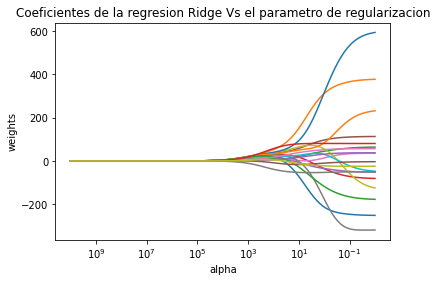

In [23]:
# Creando los valores de alpha
alphas = 10**np.linspace(10,-2,100)

ridge = Ridge() # Construye el objeto
coefs = []  # lista vacia para almacenar los coeficientes

# Bucle para ajustar sucesivamente el Rige sobre X
for a in alphas:
    ridge.set_params(alpha=a) # utilizando el metodo set_params para cambiar alpha
    ridge.fit(scaler.transform(X_train), y_train)
    coefs.append(ridge.coef_)

# Graficando los coeficientes
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # invierte el eje
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coeficientes de la regresion Ridge Vs el parametro de regularizacion');

#### Usando `sklearn.linear_model.RidgeCV` para encontrar la mejor regularización usando Ridge regression y validación cruzada

In [24]:
# from sklearn.linear_model import RidgeCV

# Creando el objeto
ridgecv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridgecv.fit(scaler.transform(X_train), y_train) # Ajustando al Training set

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=5, scoring='neg_mean_squared_error')

In [25]:
ridgecv.alpha_ # El mejor alpha

100.0

In [26]:
# Prediccion sobre el Test set
ridge2 = Ridge(alpha=ridgecv.alpha_)
ridge2.fit(scaler.transform(X_train), y_train)
mean_squared_error(y_test, ridge2.predict(scaler.transform(X_test)))

148782.52194853217

## The Lasso
Scikit-learn implementa este método mediante `sklearn.linear_model.Lasso`. En este caso, `alpha` es igual a $\lambda$

#### Graficando los coeficientes para un amplio rango de alphas

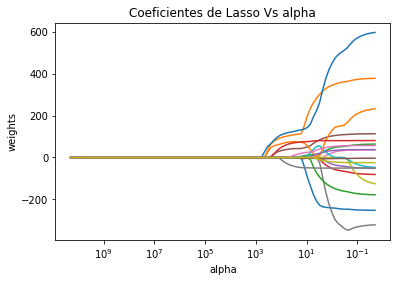

In [27]:
# from sklearn.linear_model import Lasso, LassoCV

# Creando los valores de alpha
alphas = 10**np.linspace(10,-2,100)

lasso = Lasso(max_iter=10000) # Creando el objeto
coefs = [] # Lista vacia para adherir los valores

for a in alphas:
    lasso.set_params(alpha=a) # utiliza el metodo set_params para cambiar el parametro
    lasso.fit(scaler.transform(X_train), y_train)
    coefs.append(lasso.coef_)

# Grafica de los coeficientes vs alpha
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # invierte el eje
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coeficientes de Lasso Vs alpha');

#### Usando la clase `sklearn.linear_model.LassoCV` para estimar la mejor regularización (mejor alpha)

In [28]:
# Construccion del objeto LassoCV y ajuste
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lassocv.fit(scaler.transform(X_train), y_train)

LassoCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=10, max_iter=10000)

In [29]:
# Mejor valor de alpha
lassocv.alpha_

4.641588833612772

In [30]:
# Prediccion sobre el Test set
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(scaler.transform(X_train), y_train)
mean_squared_error(y_test, lasso.predict(scaler.transform(X_test)))

142037.4474388661

Algunos de los coeficientes se reducen exactamente a cero:

In [31]:
pd.Series(lasso.coef_, index=X.columns)

AtBat          -94.667974
Hits           199.327413
HmRun           10.457444
Runs             0.000000
RBI              0.000000
Walks           50.480673
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          10.257145
CRuns          143.655609
CRBI            53.063756
CWalks          -0.000000
PutOuts         75.676555
Assists          0.000000
Errors          -2.784442
League_N        24.792569
Division_W     -49.401708
NewLeague_N     -0.000000
dtype: float64

### Combinando *feature_selection* y Lasso (CV)
Utilizaremos la regresión Lasso con cross validation y `sklearn.feature_selection.SelectFromModel`, que utiliza los coeficientes o importancias de un modelo para seleccionar las variables más importantes

In [32]:
modelo = LassoCV(cv=5)
sfm = feature_selection.SelectFromModel(modelo, max_features=7)
sfm.fit(X_train,y_train)

X_train.columns[sfm.get_support()]

Index(['Hits', 'Walks', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'PutOuts'], dtype='object')

In [33]:
model = LinearRegression()
model.fit(sfm.transform(X_train), y_train)

mean_squared_error(y_test, model.predict(sfm.transform(X_test)))

138203.70008062068

## Principal Component Analysis (PCA) + Regression (PCR)
Para usar la regresión con PCA, se debe utilizar primero la clase `sklearn.decomposition.PCA`, y luego usar la regresión (o la clasificación). Como siempre, es importante leer [la documentación de esta implementación](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA).

A continuación se muestra la implementación con el ejemplo del dataset `hitters.csv`.

In [34]:
# from sklearn.decomposition import PCA
pca = PCA() # Se instancia el objeto PCA
X_reduced = pca.fit_transform(scaler.transform(X_train)) # Se ajusta y transforma

Se pueden ver los coeficientes de la transformación de PCA (loadings), mediante el atributo `components`. En donde las filas indican las componentes principales y las columnas los predictores. 

In [35]:
pd.DataFrame(pca.components_).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.203737,0.200187,0.203885,0.197891,0.231828,0.202316,0.284603,0.330960,0.329623,0.317721,0.337407,0.341718,0.319809,0.091859,0.018099,0.003750,-0.026324,-0.018389,-0.013303
1,-0.375648,-0.370802,-0.243882,-0.377751,-0.318459,-0.248750,0.263340,0.196909,0.190294,0.127434,0.179959,0.169981,0.190372,-0.172118,-0.141606,-0.169890,0.105627,0.041755,0.079970
2,0.101610,0.086380,-0.222667,-0.027000,-0.061047,0.016328,0.022530,0.068042,0.070681,-0.110747,0.027360,0.000046,0.011444,0.067403,0.411553,0.387311,0.539297,0.004790,0.538369
3,0.061654,0.044894,-0.230924,-0.047192,-0.113972,-0.137203,0.094997,0.092290,0.084486,-0.072172,0.062842,0.003971,0.012135,-0.273596,0.516769,0.416333,-0.406623,0.109840,-0.424464
4,0.007336,-0.018347,0.167013,-0.037958,0.077289,-0.068942,-0.012798,-0.006108,-0.007833,0.064001,-0.032641,0.026477,-0.065184,0.034618,-0.086009,0.079791,0.042666,0.964266,0.050824


Las componentes principales se encuentran directamente al realizar la transformación:

In [36]:
print(X_reduced.shape)
pd.DataFrame(X_reduced).loc[:4,:5]

(197, 19)


,0,1,2,3,4,5
0,-2.495699,-0.337762,0.706392,-1.327910,-0.821824,-0.662791
1,1.570741,-0.626414,3.188770,1.162120,-1.539129,-0.618155
2,1.500092,-1.721489,-1.684486,-0.099636,1.134993,-0.353442
3,-2.494618,1.294797,-0.873011,1.381862,-1.253936,0.335756
4,-0.365453,1.675085,0.672585,-0.886890,1.002163,-0.549679


Se puede determinar la varianza explicada acumulada a través de las componentes:

In [37]:
porcentaje_var_acumulada = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(porcentaje_var_acumulada)

[38.18 59.88 70.88 78.88 84.18 88.45 92.05 94.86 96.34 97.28 98.01 98.68
 99.18 99.49 99.74 99.9  99.96 99.98 99.99]


In [38]:
np.where(porcentaje_var_acumulada<98)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)

### Encontrando el número de componentes principales adecuado usando validación cruzada

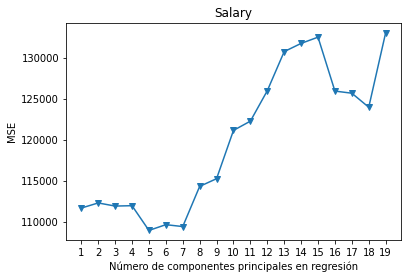

In [39]:
# 10-fold cross validation aleatorio
n = len(X_reduced)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)

regr = LinearRegression()
mse = []

# Calcula el MSE usando validacion cruzada para las 19 componentes principales,
# anyadiendo una a la vez
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y_train.ravel(),
                               cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

   
plt.plot(range(1,20), mse, '-v')
plt.xlabel('Número de componentes principales en regresión')
plt.ylabel('MSE')
plt.title('Salary')
plt.xticks(range(1,20))
plt.show()

In [40]:
np.argmin(mse) # Obtiene la posicion del minimo

4

El mejor resultado se obtiene con 5 componentes principales. Ahora, se realizara la regresión sobre el Test set, usando sólo este número de componentes.

In [41]:
# Transformando el Test set con PCA y seleccionando solo 5  componentes
X_reduced_test = pca.transform(scaler.transform(X_test))[:,:5]

# Entrenando el modelo, usando solo 5 componentes principales
regr = LinearRegression()
regr.fit(X_reduced[:,:5], y_train)

# Prediccion con el conjunto de prueba
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

153337.2367629326